<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

# Описание проекта

__Контекст__

Мы являемся аналитиками крупного интернет-магазина. Вместе с отделом маркетинга подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

___

# __Часть 1. Приоритизация гипотез.__
В файле hypothesis.csv 
указаны 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами: Reach, Impact, Confidence, Effort.


_Задача_


- Применить фреймворк ICE для приоритизации гипотез. Отсортиртировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. 
- Объяснить, почему так произошло.

In [1]:
#Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
#Пропишем путь до данных для пользователя и для ревьюера
try:
    data = pd.read_csv(r'C:\Users\hypothesis.csv ',sep = ',')
    
except:
    data = pd.read_csv('/datasets/hypothesis.csv',sep = ',')

In [3]:
#т.к.всего 9 гипотез и файл небольшой (мы знаем из Легенды), можем позволить без нагрузки на  ПО выгрузить все данные

data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


__Какие данные мы получили в файле?__

•	Hypothesis — краткое описание гипотезы;

•	Reach — охват пользователей по 10-балльной шкале;

•	Impact — влияние на пользователей по 10-балльной шкале;

•	Confidence — уверенность в гипотезе по 10-балльной шкале;

•	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Каждому из параметров  гипотез ставят оценку. Шкалу можно выбрать самостоятельно, в нашем случае  от 1 до 10.
Также  применяют  баллы от 0 до 10 или ряд Фибоначчи (1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144). 
Данные должны  быть  в целочисленном виде.

In [4]:
#Cразу вывести  информацию о ДФ
def showtime(df):
    display("Выведем информацию по  имеющимся в файле Данным")
    display(df.info())
    display('-'*10)
    display("Есть ли пропуски в  Данных и их количество")
    display(df.isna().sum())
    display('-'*10)
    display("Какое количество дубликатов в  Данных")
    df.duplicated().sum()
    display('-'*10)
    
showtime(data) 

'Выведем информацию по  имеющимся в файле Данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'----------'

'Есть ли пропуски в  Данных и их количество'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'----------'

'Какое количество дубликатов в  Данных'

'----------'

Всего 9 строк, дубликатов нет, пропуски  в данных отсутствуют. Сами гипотезы представлены в строковом виде, числа в целочисленном виде. Менять здесь ничего не надо. Замечу только что названия колонок нужно привести к нижнему регистру.

In [5]:

data = data.rename(columns = {'Hypothesis':'hypothesis', 'Reach':'reach', 'Impact' :'impact', \
                              'Confidence' : 'confidence', 'Efforts' : 'efforts'})

In [6]:
data.info() #проверим что изменения применились

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Интересно посмотреть как  распределены баллы по колонкам. Какая градация баллов.

In [7]:
# reach — скольких пользователей затронет изменение, которое вы хотите внести
data.reach.unique()

array([ 3,  2,  8,  5, 10,  1], dtype=int64)

In [8]:
# impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта
data.impact.unique()

array([10,  5,  3,  1,  2,  7,  9], dtype=int64)

In [9]:
# confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так
data.confidence.unique()

array([8, 4, 7, 3, 1, 2, 9], dtype=int64)

In [10]:
# efforts — сколько стоит протестировать эту гипотезу
data.efforts.unique()

array([ 6, 10,  3,  8,  1,  5], dtype=int64)

___


# __Расчитаем ICE, RICE  по данным из ДФ.__

Создадим  новые колонки  сразу в нижнем регистре.
Отсортируем по убыванию.


__ICE и RICE__ - что это такое? — одни из самых популярных способов приоритизации задач:

Проверка гипотез чаще всего стоит дорого, а ресурсов не хватает. Придётся выбрать, что будем тестировать, а чему скажем «нет». Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируют. 


__Фреймворк _ICE_ (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота») __

ФОРМУЛА РАСЧЕТА:
ICE score = (impact * confidence)/efforts


__Фреймворк _RICE_ состоит из четырёх компонент:__

- Reach — скольких пользователей затронет изменение, которое вы хотите внести; 
- Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта; - Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так; 
- Efforts — сколько стоит протестировать эту гипотезу. 

ФОРМУЛА РАСЧЕТА:
RICE score = (reach * impact * confidence)/efforts


__Reach__  отвечает за ЧИСЛЕННЫЙ охват пользователей на практике померить чаще всего несложно. 

Делают это на основе уже имеющихся данных, оценки конкурентов или оценки объёмов рынка.   Если принята шкала линейной оценки гипотезы от 0 до 10, где 0 — «охват гипотезы ни на кого не повлияет», а 10 — «гипотеза охватит хотя бы половину пользователей». Допустим, что доля выручки приблизительно соответствует охвату пользователей. Тогда, если 10 ба ллов — это 50% пользователей, то 10% пользователей — это 2 балла.

__Impact__ отвечает силу влияния изменения метрики на этих пользователей и измеряют по-разному :

- По доле от общей площади экрана, которую составят меняющиеся элементы, в %;
- По степени изменения пользовательского опыта;
- По предварительной оценке важности для пользователей;
- По количеству новых пользователей, которых изменение поможет привлечь.

__Confidence__ показывает, насколько вы уверены в оценках других параметров. 

Уверенность, например, будет высокой, если:
- вы можете точно посчитать, сколько пользователей подвержено изменению;
- у вас есть доказательства, что данное изменение повлияет с тем impact, который вы оценили (например, за счёт предыдущего опыта или кейсов конкурентов);
- у вас есть точная оценка трудозатрат, и рисков их увеличения нет, либо они низкие.

__Efforts__ показывает, насколько сложно проверить гипотезу.

В большинстве компаний на рынке разработка очень дорогая и выступает основным ресурсом. Если проверка гипотезы не требует разработки, её Efforts значительно снижается.

In [12]:
data['ice']=(data['impact']*data['confidence'])/data['efforts']
data['ice'] = data['ice'].round(2)
pd.options.display.max_colwidth = 210
data[['hypothesis','ice']].sort_values(by = 'ice', ascending = False)



,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


<div class="alert alert-info">
<b>Михаил, спасибо, красиво получается и очень наглядно.</b>
<br>
</div>

_Что дает расчет и сортировка?_

__При расчете  ICE  гипотезы  по убыванию: 8,0,7  заняли  тройку лидеров.__

НО!! Важен не только  ранг который заняла гипотеза, но и количество баллов  при расчете по формулам.
почему  произошло так?

В гипотезе № 8  маркетологи и аналитики  сильно уверены в силе влияния на пользователей а также на собственную уверенность в анализе данных, затраты на  продвижение гипотезы-средние.
Гипотеза № 0 похожа на ситуацию с гип-ой 8, но затраты на балл выше чем  у лидера поэтому она на 2 месте рейтинга.
Гипотеза № 7  затраты на продвижение  как у гип-зы 8, но вот с уверенностью в оценке анализа данных, а также силы влияния  не такие высокие.

__Аутсайдеры  рейтинга - гипотезы  5,3,4 в порядке убывания.__
Почему с ними так обстоит дело?

Гипотеза 5 - усилия по  затратам  на проверку гипотезы превосходят и уверенность и  силы влияния каждую на 1 балл. Слишком много усилий по отношению к impact & efforts.
Гипотеза 3 - очень много усилий (затратно)  изменения, в то время как сила влияния и уверенности  низко (по 3 балла каждый показатель.
Гипотеза 4 - все расчетные колл-ва баллов по 1  - самые низкие из всех баллов.

In [13]:
# расчитаем  по формуле  RICE:

data['rice']=(data['reach']*data['impact']*data['confidence'])/data['efforts']
print(data[['hypothesis','rice']].sort_values(by = 'rice', ascending = False))

                                                                                                     hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

_При расчете RICE отметим что  формула иная и, соответственно, рейтинг  меняется._

__Тройка лидеров по убыванию: гипотезы 7,2,0__

Сильно влияют наивысшие баллы показателей которые присвоили аналитики и маркетологи (10).В то же время произведение react, impact,confidence по отношению к затратам имеют существенный вес. также заметим что баллы за усилия довольно  высоки, как, например 5  баллов   у гипотезы  № 7 и 6 баллов у гипотезы № 0).
    
__Тройка аутсайдеров по убыванию: 1,5,4__

Характерно что затраты на проверку гипотезы, доп. разработки высоки(10 баллов в гипотезе №1 ) или не сильно  отличаются от других показателей по баллам по соотношению из произведений (гип-зы  5,4).


___


Видим что  среди тройки лидеров и в расчете  ICE  и в   RICE присутствуют гипотезы  № 7 и 0.

Так же  как  среди тройки аутсайдеров и в расчете  ICE  и в RICE   присутствуют гипотезы № 5,4



# __Предварительные  выводы:__

__Необходимо точно оценивать каждый из параметров/показателей. Кроме силы гипотезы нужно учитывать как много пользователей затронет эта гипотеза.__

___

# __Часть 2. Анализ A/B-теста__

Проведены A/B-тест и получили результаты, которые описаны в файлах: 
    
- orders.csv и 
- visitors.csv



___

In [14]:
# пропишем пути для загрузки данных
try:
     orders, visitors  = (
         pd.read_csv(r'C:\Users\orders.csv',sep = ','),
         pd.read_csv(r'C:\Users\visitors.csv',sep = ','))
except:
     orders, visitors  = (
         pd.read_csv('/datasets/orders.csv',sep = ','),
         pd.read_csv('/datasets/visitors.csv',sep = ','))


In [15]:
#не знаем сколько данных, записей, поэтому  из каждого ДФ  выведем по 5 первых строк

orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [16]:
# выведем 5 первых строк
visitors.head(5)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Какие данные содержат  колонки?

_Файл orders.csv_

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

_Файл visitors.csv_

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [17]:
# выведем данные ДФ
showtime(orders) 

'Выведем информацию по  имеющимся в файле Данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

'----------'

'Есть ли пропуски в  Данных и их количество'

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

'----------'

'Какое количество дубликатов в  Данных'

'----------'

In [18]:
# количество строк (длина) ДФ  orders
len(orders)

1197

In [19]:
# узнаем точно как называются колонки в ДФ
orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [20]:
# выведем данные ДФ
showtime(visitors) 

'Выведем информацию по  имеющимся в файле Данным'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'----------'

'Есть ли пропуски в  Данных и их количество'

date        0
group       0
visitors    0
dtype: int64

'----------'

'Какое количество дубликатов в  Данных'

'----------'

In [21]:
# количество строк (длина) ДФ  orders
len(visitors)

62

In [22]:
# узнаем точно как называются колонки в ДФ
visitors.columns

Index(['date', 'group', 'visitors'], dtype='object')


Колонки transactionId  & visitorId  в ДФ orders переведем  в Питоньий стиль и переименуем на transaction_id  & visitor_id

Поменяем  вид данных  date  из строкового в  datetime


In [23]:
orders = orders.rename(columns = {'transactionId':'transaction_id', 'visitorId':'visitor_id'})

###########

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [24]:
# проверим что  изменения в колонках "принялись"
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [25]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


# __Задача__

_Проанализировать A/B-тест:_

In [26]:
groups_orders = orders.group.nunique()
groups_visitors = visitors.group.nunique()

groups_date_min = orders.date.min()
groups_date_max = orders.date.max()
groups_visitors_min = visitors.date.min()
groups_visitors_max = visitors.date.max()

print(f'В данных файла  orders количество групп - {groups_orders}')
print(f'В данных файла  visitors количество групп - {groups_visitors}')
print(f'В данных файла  orders данные доступны  в период с  - {groups_date_min} по {groups_date_max} ')
print(f'В данных файла  visitors данные доступны  в период с  - {groups_visitors_min} по {groups_visitors_max}')

В данных файла  orders количество групп - 2
В данных файла  visitors количество групп - 2
В данных файла  orders данные доступны  в период с  - 2019-08-01 00:00:00 по 2019-08-31 00:00:00 
В данных файла  visitors данные доступны  в период с  - 2019-08-01 00:00:00 по 2019-08-31 00:00:00


Количество групп и  минимальные\максимальные даты  проведения тестов совпадают.

In [27]:
uniq_visit_orders = orders.groupby('group').agg({'visitor_id':'nunique'})
uniq_visit_orders

,visitor_id
group,
A,503
B,586


Количество уникальных участников по группама: а = 503 чел., в = 586 чел.

In [28]:
a_group_list = len(visitors[visitors['group'] == 'A']) 
b_group_list = len(visitors[visitors['group'] == 'B']) 
print(f'Количество записей  по группе А - {a_group_list}')
print(f'Количество записей  по группе B - {b_group_list}')

Количество записей  по группе А - 31
Количество записей  по группе B - 31


In [29]:
z = (np.intersect1d(orders.query('group == "A"')['visitor_id'], orders.query(
'group == "B"')['visitor_id'], assume_unique = False))
len(z)

58

2 вариант проверки(если права) :

In [69]:
a = orders[orders['group']=='A']['visitor_id'].unique()
b = orders[orders['group']=='B']['visitor_id'].unique()
result = a.equals(other=b)
print(result)

AttributeError: 'numpy.ndarray' object has no attribute 'equals'

In [70]:
len(a) # количество уникальных значений группы А


503

In [71]:
len(b) # количество уникальных значений группы B

586

In [33]:
y = orders[orders['group']=='A']['visitor_id'].unique()
t = orders[orders['group']=='B']['visitor_id'].unique()



503
586


In [68]:
e = []
for i in y:
    for k in t:
        if i == k:
           e.append(i)
len(e)

58

Результат: в группах А и В  разные id посетителей.

__Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.__

Чтобы построить графики, нужно собрать кумулятивные данные. Объявим датафрейм cumulativeData со столбцами: date — дата; group — группа A/B-теста (A или B); orders — кумулятивное количество заказов на указанную дату в указанной группе; buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе; revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек); visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.
Создадим массив уникальных пар значений дат и групп теста методом drop_duplicates(): 

In [37]:
# создаем массив уникальных пар значений дат и групп теста

dates_groups = orders[['date','group']].drop_duplicates()

dates_groups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


Отберём агрегированные кумулятивные по дням данные о заказах. Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из dates_groups:

Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков. Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 'date' и 'group':

In [38]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= \
                  x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', \
                  'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), \
                    axis=1).sort_values(by=['date','group'])

orders_aggregated.head()

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Код работает так, будто мы ежедневно считали результаты тестирования до выбранного дня включительно и сохраняли их в строках таблицы orders_aggregated.

Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:

In [39]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date']\
        <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max',\
        'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [40]:
# Объединим обе таблицы в одну с понятными названиями столбцов:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'],\
                                        right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [41]:
len(cumulative_data)

62

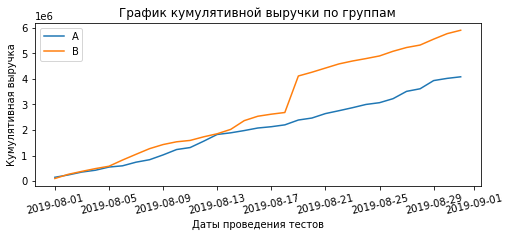

In [42]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А

cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B

cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]


#Построим графики кумулятивной выручки по дням и группам A/B-тестирования:
plt.figure(figsize=(8, 3))
# Строим график выручки группы A
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xticks(rotation=13)
plt.xlabel('Даты проведения тестов')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.show();

Выручка увеличивается в течение всего теста. 
Если группа А четко равномерно линейно растет, то группа В имеет рывок в кумулятивной выручке в середине теста с 17 августа.  Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке группы В.


__Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.__

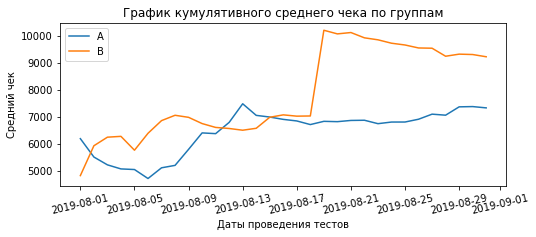

In [43]:
# разделим кумулятивную выручку на кумулятивное число заказов:
plt.figure(figsize=(8, 3))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], \
                                                 label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], \
                                                 label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xticks(rotation=13)
plt.xlabel('Даты проведения тестов')
plt.ylabel('Средний чек')
plt.legend()
plt.show()

Средние чеки по группам с самого начала теста разные. Динамика  по группам в первой трети разнонаправленная. В середине теста  группы встречаются, и, если  группа А  имеет рваную , неустойчивый подъем, который к концу теста  завершаетс на уровне  среднего чека середины чека, то   группа В в середине теста  даже по среднему чеку имеет резкий всплеск, но  все же снижается к концу теста.
Показатели у группы В  по среднему чеку гораздо лучше на всем протяжении теста.
с Большей долей вероятности подтверждаем мысль что   в группе В в середине теста (с 17.08) были очень  крупные заказы, которые  довели показатели в среднем  чуть выше 10 тыс. в то  же время как группа А имела  гораздо скромные показатели на уровне около 7 тыс.
Нужно больше данных, чтобы прийти к реальному среднему чеку.


__Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.__


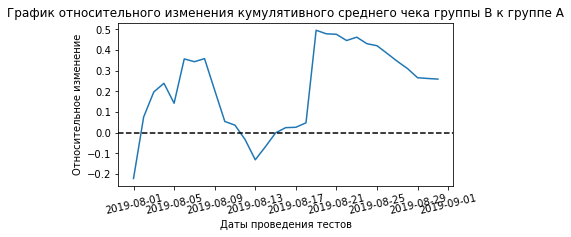

In [44]:

# собираем данные в одном датафрейме,объединяем по датам
merg_cum_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on\
                                 ='date', how='left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(6, 3))
plt.plot(merg_cum_revenue['date'], (merg_cum_revenue['revenue_b']/merg_cum_revenue['orders_b'])/\
                                 (merg_cum_revenue['revenue_a']/merg_cum_revenue['orders_a'])-1)

#  добавляем горизонтальную ось X по "0"

plt.axhline(y=0, color='black', linestyle='--')
plt.xticks(rotation=13)
plt.xlabel('Даты проведения тестов')
plt.ylabel('Относительное изменение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show();

Отмечаем  в период  между 05.08 -06.08 и  приблизительно 15-16.08 резкие пики и  глубокая просадка ниже   "0" до отрицательных значений 13 августа. Предположение - из-за выбросов и  крупных заказов.

__Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.__

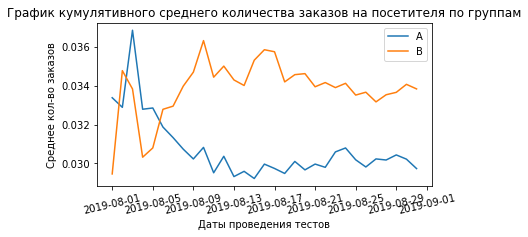

In [45]:
# считаем кумулятивную конверсию всех заказов к всем  посетителям
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A & B
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(6, 3))
plt.xticks(rotation=13)
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A') # ось x = даты, ось у - данные расчета конверсии
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.xlabel('Даты проведения тестов')
plt.ylabel('Среднее кол-во заказов')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();


В группе А конверсия  закосов к посетителям снижалась почти с момента анализа теста. 
2 - 3 августа резкй подъем и крутой спуск, где 09-13 августа  конверсиия припала ко  "дну", с которого  немного    данные поднялись но  с  маленьким успехом. 
У группы  В также в  период 01-02.08 был всплеск,  и резкий спуск до, приблизительно  05.08, но в отличает от группы  А группа смогла подняться и показать наилучшие результаты  относительно конкурирующей группы до  09.08. Единственно успех не смог закрепиться и   вплоть до  конца теста   начал снижение.
Конверсия только  с первой четверти теста (1 неделя)  симметричная. Складывается впечателние что пользователи не могли определиться  или разобраться с предметом использования.
Не имеем данные трафик какого портала мы тестируем + данные только за август. Но складывается впечатление что тестировались 2 варианта захода на платформу к  какому-то специализированному магазину, моя гипотеза - для школьников, т.к. к началу сентября  переход от посетителя к покупателю серьезно упал.

__Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.__

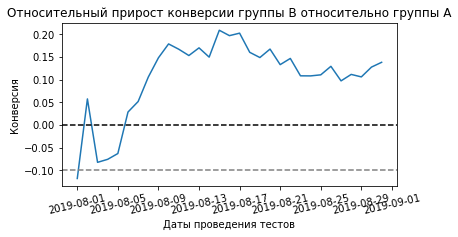

In [46]:
merg_сum_сonvers = cumulative_data_a[['date','conversion']].\
merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', \
      suffixes=['_a', '_b'])

plt.figure(figsize=(6, 3))
plt.xticks(rotation=13)
plt.plot(merg_сum_сonvers['date'], merg_сum_сonvers['conversion_b']/\
         merg_сum_сonvers['conversion_a']-1)

plt.title("Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Даты проведения тестов')
plt.ylabel('Конверсия')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.show()

с Начало тестирования до 5 августа были проблемы. Далее  уверенный рост и серьезная нонвертация в заказчики в группе B  если снижение группы А смогли вывести в рост. До конца тестирования подъем не  смогли сохранить.

Отметим небольшую стаблизацию результатов теста около определенного значения после 21.08.

__Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.__

In [47]:
# на основе "сырых"  сгруппируем  ДФ orders  по  посетителям  и посчитаем их покупки

orders_by_users = (orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'}))
# переименуем колонки
orders_by_users.columns = ['visitors', 'orders']
# отсортируем  покупки  по убыванию - узаем как много покупали   посетители
orders_by_users.sort_values(by='orders', ascending=False).head(7)

,visitors,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5


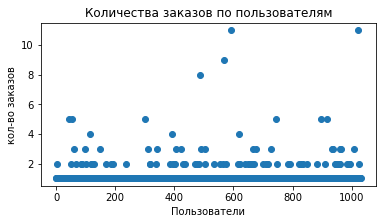

In [48]:
#Построим точечную диаграмму числа заказов на одного пользователя:
x_values = pd.Series(range(0,len(orders_by_users)))
plt.figure(figsize=(6, 3))
plt.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Пользователи')
plt.ylabel('кол-во заказов')
plt.title("Количества заказов по пользователям"); 

 Удобно применять график рассеивания  для поиска аномалий. Ясно видно что бОльшинство  посетителей делали  преимущественно 1-2 покупки, 5- это редко, ну а от 8 и до 11 значений - это уже редкость.

__Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберим границу для определения аномальных пользователей.

In [49]:
# Использую функцию  percentile
np.percentile(orders_by_users['orders'], [90, 95, 99])

array([1., 2., 4.])

In [50]:
# Использую функцию  quantile для проверки данных 
m_90 = orders_by_users['orders'].quantile(0.9)
m_90

1.0

In [51]:
m_95 = orders_by_users['orders'].quantile(0.95)
m_95

2.0

In [52]:
m_99 = orders_by_users['orders'].quantile(0.99)
m_99

4.0

Видим что  к 90,95 и 99 % количествам заказов соответствуют 1,2 и 4 покупки посетителей соответственно. Не более 5% пользователей оформляли больше чем 2 заказов. Все что выше - от 5 и выше покупок - составляет  только 1 %. 

Допустимо удалять  не боле 10% от данных если возникают  вопросы по выбросам или были обнаружены дубликаты.

Могу предположить что разумно выбрать  больше 2 заказов (95 % персентиль) на одного пользователя за верхнюю границу количества заказов, и отсеивать аномальных пользователей по ней.

П.С. - была удивлена таким показателям (массой) поэтому перепроверила  (не поверила своим глазам).

__Построим точечный график стоимостей заказов. Сделаем выводы и предположения.__

      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A


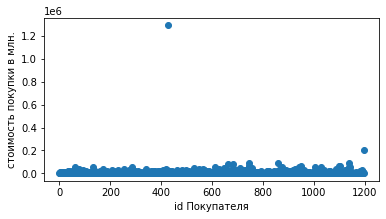

In [53]:
# на основе "сырых"  сгруппируем  ДФ orders  по  стоимостям  покупок (убыванию)
print(orders.sort_values(by='revenue', ascending=False).head(7))
plt.figure(figsize=(6, 3))
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('id Покупателя')
plt.ylabel('стоимость покупки в млн.');


Как видим, один  посетитель за № 425 совешрил  САМОЕ большое приобретение   -  1.294.500  у.е,
 и  № 1196 приобрел на сумму 202.740 - очень хорошо видно.
    Подавляющее большинство  выше 100 тыс.  не делало покупки.

__Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберим границу для определения аномальных заказов.__

In [54]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

In [55]:
orders['revenue'].quantile(0.95) #перепроверка данных

28000.000000000004

Выборка по персентилям показала что 99 % соответствует значению  58232,2 - величина не превышает этот показатель с заданной вероятностью.
Выберу границу  так же как и количеством покупок - 95 персентиль (28 тыс)

__Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.__

In [56]:
print(orders.head(2))
print('_'*10)
print(visitors.head(2))

   transaction_id  visitor_id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
__________
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619


In [57]:
visitors_a_daily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

visitors_a_cummulative = visitors_a_daily.apply(
    lambda x: visitors_a_daily[visitors_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}), axis=1,)

visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

visitors_b_daily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

visitors_b_cummulative = visitors_b_daily.apply(
    lambda x: visitors_b_daily[visitors_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}), axis=1,)

visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']


orders_a_daily = (orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

orders_a_cummulative = orders_a_daily.apply(
        lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_a': 'sum', 'revenue_per_date_a': 'sum'}), axis=1,
        ).sort_values(by=['date'])

orders_a_cummulative.columns = ['date','orders_cummulative_a', 'revenue_cummulative_a']

orders_b_daily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'}))

orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

orders_b_cummulative = orders_b_daily.apply(
        lambda x: orders_b_daily[orders_b_daily['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_b': 'sum', 'revenue_per_date_b': 'sum'}), axis=1,
        ).sort_values(by=['date'])
 
orders_b_cummulative.columns = ['date', 'orders_cummulative_b','revenue_cummulative_b']

data_merge = (
    orders_b_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')
    .merge(orders_a_cummulative, left_on='date', right_on='date', how='left')
    .merge(orders_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_a_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_daily, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left')
    .merge(visitors_b_cummulative, left_on='date', right_on='date', how='left'))

#Создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['user_id', 'orders']. В них для пользователей, 
#которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

orders_by_users_a = (orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_a.columns = ['user_id', 'orders']

orders_by_users_b = (orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique}))
orders_by_users_b.columns = ['user_id', 'orders']

#Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. 
#Тем, кто ничего не заказал, будут соответствовать нули

sample_a = pd.concat([orders_by_users_a['orders'],pd.Series(0, index=np.arange(data_merge['visitors_per_date_a'].
     sum() - len(orders_by_users_a['orders'])), name='orders')],axis=0)

sample_b = pd.concat([orders_by_users_b['orders'],pd.Series(0, index=np.arange(data_merge['visitors_per_date_b'].
     sum() - len(orders_by_users_b['orders'])), name='orders')],axis=0)

print(f'P-value:' "{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))

print(f'Среднее относительно группы В:  '"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

P-value:0.01679
Среднее относительно группы В:  0.138


Примим за  альфу P-value = 0.05
в проведенном Манна-Уитни (mannwhitneyu)  тесте показатель  P-value значительно меньше 0.05. Н 0 (нулевая гипотеза)  предполагалось что количестве заказов на посетителя между группами равна. т.к. P-value в нашем расчете 0,01679, то мы можем ее (гипотезу)  опровергнуть и считать что существует статистически  значимые различия. Среднее количество заказа на человека  между группами различное.

Относительный прирост среднего группы В  к конверсии группы А, основываясь на "сырых" данных - 13,8%

__Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.__

In [58]:

print("P-value : "'{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], \
                                          orders[orders['group']=='B']['revenue'])[1]))
print("Отношение среднего чека группы B/A: "'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']\
                                         ['revenue'].mean()-1)) 


P-value : 0.72929
Отношение среднего чека группы B/A: 0.259


P-value значительно выше 0,05. Н 0 (нулевая гипотеза)  предполагала что между группами в среднем чек на посетителя  равен. т.к. P-value в нашем расчете 0.72929, то мы можем подтвердить гипотезу  и считать что  нет  статистически  значимых различий. 

Хотя относительное различие среднего чека между группами, основываясь на "сырых" данных - 25,9%

__Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.__

In [59]:
# создадим  список аномальных пользователей по 2 выявленным признакам
# удаляем пользователей с  кол-во заказов больше 2 - 95 персентиль.
# создам переменную  где будут только  данные  покупок более 2
users_lo_orders = pd.concat([
        orders_by_users_a[orders_by_users_a['orders'] > 2]['user_id'],
        orders_by_users_b[orders_by_users_b['orders'] > 2]['user_id'],],axis=0,)

expensive_users = orders[orders['revenue'] > 28000]['visitor_id']

abnormal_users = (pd.concat([users_lo_orders, expensive_users], axis=0).drop_duplicates().sort_values())

print(f'Количество  пользователей - {len(expensive_users)}   совершающих дорогие покупки, более 95 персентиля')
print(f'Количество  пользователей - {len(users_lo_orders)} совершающих большое кол-во  покупок')
print(f'Количество  пользователей - {len(abnormal_users)}  после удаления дубликатов')


Количество  пользователей - 60   совершающих дорогие покупки, более 95 персентиля
Количество  пользователей - 24 совершающих большое кол-во  покупок
Количество  пользователей - 74  после удаления дубликатов


In [60]:
# 
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['user_id'].isin(abnormal_users))]\
            ['orders'],pd.Series(0,index=np.arange(data_merge['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])),\
            name='orders',),], axis=0,)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['user_id'].isin(abnormal_users))]\
            ['orders'], pd.Series(0,index=np.arange(data_merge['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])),\
            name='orders',),],axis=0,)

print("P-value: "'{0:.5f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
# Относительный прирост среднего числа заказов относительно групп
print("Относительное среднее: "'{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1))


P-value: 0.01304
Относительное среднее: 0.173


Мы удалили  записи аномальных покупателей (в переменной(abnormal_users))и на основе  этих данных по группам  orders_by_users_a и orders_by_users_b сделали выборку по условию  того что данные из аномальных покупателей в переменные orders_by_users_a и orders_by_users_b  не входят.
Провели анализ с помощью статистического  теста Манна-Уитни. Значение p-value   меньше  альфы (0.05), следовательно мы  можем отвергнуть  Н 0 гипотезу о равенстве кол-ва заказов в среднем между группами  по  "очищенным" данным.
Следовательно  принимаем  Н 1 гипотезу : среднее количестве заказов на посетителя между группами по «очищенным» данным НЕ равны.
Относительный прирост среднего числа заказов группы B  по отношению к группе А  равен 17%.


__Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.__

In [61]:

print("P-value: "'{0:.5f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
            np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'],\
            orders[np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitor_id'].isin(abnormal_users)),)\
            ]['revenue'],)[1]))

print('Относительное среднее: '"{0:.3f}".format(orders[np.logical_and(orders['group'] == 'B', np.logical_not(orders['visitor_id'].isin\
            (abnormal_users)),)]['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',\
            np.logical_not(orders['visitor_id'].isin(abnormal_users)),)]['revenue'].mean() - 1 ))


P-value: 0.73848
Относительное среднее: -0.020


К данным ДФ orders применили статистический тест Манна-Уитни, до того применили логическую последовательность что в orders нет данных abnormal_users.
Уровень  p-value вследствие теста показал что Н 0 (средний чек между группами равен) мы не можем отвергнуть в то же время  статистическая значимость между группами - 2%.


__Примим решение по результатам теста и объясним его. __

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

# Выводы

Какие данные мы получили из тестов:

B в 'cырых'  и в 'очищенных'  данных  группы А и Б по  среднему КОЛИЧЕСТВУ заказов не одинаковы,
и в 'cырых'  и в 'очищенных'  данных  группы А и Б разницы по среднему чеку заказа между группами статистический  тест Манна-Уитни не обнаружил.
График Относительного прироста конверсии между группами сообщает, что результаты группы B ЛУЧШЕ группы A: имеют тенденцию к росту. Относительный прирост среднего числа заказов группы B  по отношению к группе А  равен 17%.
График различия среднего чека колеблется: он-то и позволил вам найти аномалии, но делать из этого графика определённые выводы нельзя.

Настройки группы "В" брать за основные и уже  на этом фоне корректировать, дорабатывать и  в дальнейшем  уже по новым идеям группы  С относительно B дополнительно тестировать работу. На Графике кумулятивного среднего количества заказов на посетителя по группам  мы видим плохой старт - для этого нужна отдельная проверка  - т.к.  у группы А показатели в этот период были много лучше.  Относительный прирост конверсии 5 августа  уверенно превалирует над группой А и сохранил тенденцию. Отношение среднего чека группы B/A:25,9% тоже впечатляет, но это  расчет по грязным данным, среднее по чекам  в небольшом минусе по чистым данным.

Получается  что в группе В больше возможностей для увеличения  потенциала для привлечения  пользователей и по количеству  покупок  и по  стоимости. Мы выяснили что количество  пользователей по группам не равно, это другой вопрос, но какие условия были по  этой выборке? много вопросов и много доработок. Но нет. Оставляем настройки группы B - как дальнейших тестируемых идеи. Нельзя уверено сказать что  настройки группы идеальны. 
    

Считаю что тест  можно  завершить и  применять настройки группы В как минимальные.

